In [ ]:
#Rishit

print("Welcome Team!")

Welcome Team!


In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
# Rishit


# EDA (Summary statistics)
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Check shape
print("Shape of dataset:", df.shape)

# Class distribution (Fraud vs Non-Fraud)
print("\nClass Distribution:")
print(df['Class'].value_counts())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Number of fraud and non-fraud transactions
fraud_counts = df['Class'].value_counts()
num_non_fraud = fraud_counts[0]
num_fraud = fraud_counts[1]

print(f"Number of Non-Fraud transactions in current datasest: {num_non_fraud}")
print(f"Number of Fraud transactions in current datasest: {num_fraud}")


# Summary statistic

selected_features = ['Time', 'Amount', 'V1', 'V2']
summary_stats = df[selected_features].describe()

print("\n Summary Statistics:")
print(summary_stats)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


Histogram


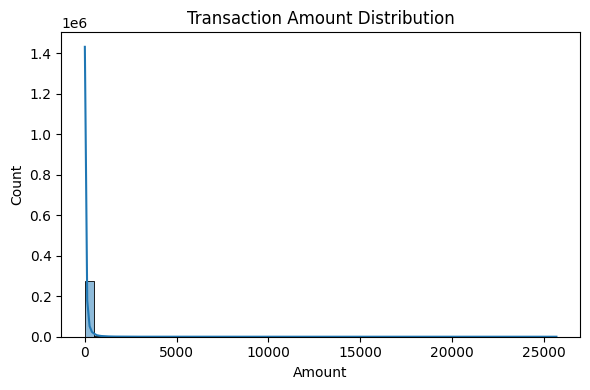


Distribution


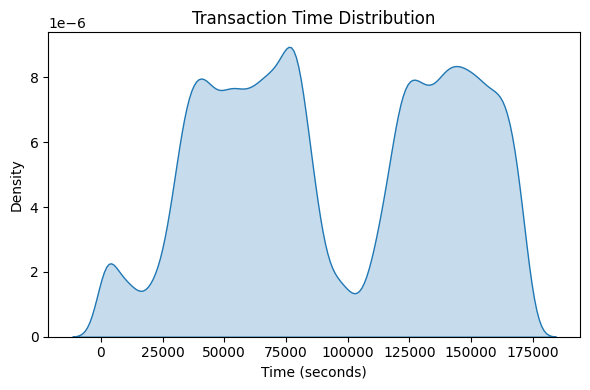


Bar chart


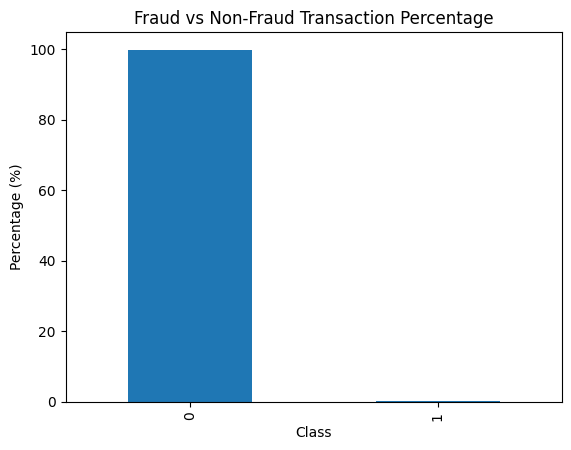


Correlation Chart


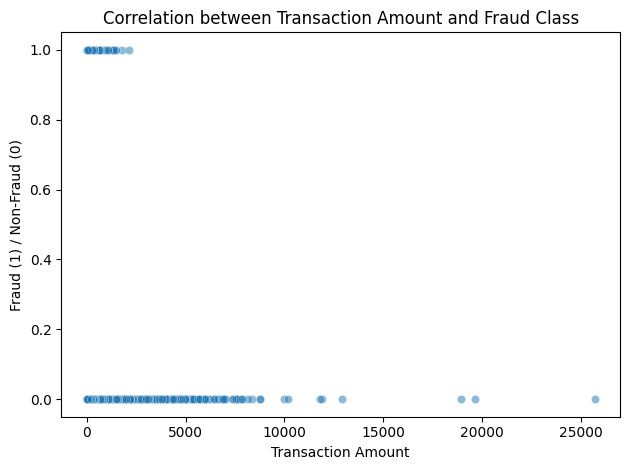

In [4]:
#Rishit

#EDA Visuals

import seaborn as sns
import matplotlib.pyplot as plt

#  Visualization 1: Histogram of Transaction Amount
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.tight_layout()
print("Histogram")
plt.show()
print( )

# Visualization 2: Distribution of Transaction Time
plt.figure(figsize=(6,4))
sns.kdeplot(df['Time'], fill=True)  # fill=True makes it a filled curve
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.tight_layout()
print("Distribution")
plt.show()
print( )


# Visualization 3: Bar chart of Fraud vs Non-Fraud transactions
fraud_pct = df['Class'].value_counts(normalize=True) * 100
fraud_pct.plot(kind='bar')
plt.title('Fraud vs Non-Fraud Transaction Percentage')
plt.ylabel('Percentage (%)')
print("Bar chart")
plt.show()
print( )


# Visualization 4: correlation chart of Fraud vs Non-Fraud transactions
sns.scatterplot(x='Amount', y='Class', data=df, alpha=0.5)
plt.title('Correlation between Transaction Amount and Fraud Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Fraud (1) / Non-Fraud (0)')
print("Correlation Chart")
plt.tight_layout()
plt.show()

In [5]:
#PHASE 2 STARTS FROM HERE
#Rishit
# Model from scratch,
# Data Preprocessing:

#Removing duplicates function

def remove_duplicates(df):
    bef = len(df)
    df_clean = df.drop_duplicates()
    aft = len(df_clean)
    print(f"Removed {bef - aft} duplicate rows.")
    return df_clean

df=remove_duplicates(df)

Removed 1081 duplicate rows.


In [6]:
#Rishit
#Removing missing values

df = df.dropna(subset=['Class'])
print("Dropped rows with missing Class label.")

#seperating numerical and categorical columns
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(exclude='number').columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Dropped rows with missing Class label.
Numeric columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Categorical columns: []


In [7]:
#Rishit
#impying mean imputation for numerical values to handle continuous variables

def impute_missing_mean(df, num_cols):
    """
    Replaces missing values in numeric columns with the mean of each column.
    """
    for col in num_cols:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)
    print("Mean imputation applied to numeric columns.")
    return df

df = impute_missing_mean(df, num_cols)
print("Missing values after imputation:")
print(df.isnull().sum())

# print("Missing values BEFORE:")
# print(missing_cols)

# print("Missing values AFTER:")
# print(df.isnull().sum().sum())

Mean imputation applied to numeric columns.
Missing values after imputation:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
#Rishit
#Scaling the data

#1) scaling the time using mix-max scaler method

def min_max_scale(series):
    min_val = series.min()
    max_val = series.max()
    return (series - min_val) / (max_val - min_val)

#2) scaling amount using z-score
def z_score_scale(series):
    mean_val = series.mean()
    std_val = series.std()
    return (series - mean_val) / std_val

df['Time'] = min_max_scale(df['Time'])
df['Amount'] = z_score_scale(df['Amount'])

print(df[['Time', 'Amount']].describe())


                Time        Amount
count  283726.000000  2.837260e+05
mean        0.548701 -5.810039e-17
std         0.274787  1.000000e+00
min         0.000000 -3.533262e-01
25%         0.313699 -3.309620e-01
50%         0.490141 -2.654666e-01
75%         0.806160 -4.378080e-02
max         1.000000  1.022474e+02


In [9]:
# sagar
# Train Random Forest and Logistic Regression

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#preprocess the dataset

def impute_missing_mean(df, num_cols):
    for col in num_cols:
        df[col] = df[col].fillna(df[col].mean())
    return df

def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

def z_score_scale(series):
    return (series - series.mean()) / series.std()

df = df.drop_duplicates()
df = df.dropna(subset=['Class'])
num_cols = df.select_dtypes(include='number').columns.tolist()
df = impute_missing_mean(df, num_cols)
df['Time'] = min_max_scale(df['Time'])
df['Amount'] = z_score_scale(df['Amount'])

# split the dataset

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# train logistic regression model

log_reg = LogisticRegression(max_iter=500, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))

print("\n")

# train random forest model

rf = RandomForestClassifier(
    n_estimators=40,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Results
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746




Random Forest Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.99      0.69      0.81        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [10]:
# Franco Miguel
# Logistic Regression implemented from scratch by using gradient descent method.
# Trains and evaluates the from-scratch Logistic Regression model
# Binary classification labels: 0 and 1.


#SCRATCH MODEL IMPLEMANTAION

class ScratchLogisticRegression:


    def __init__(self, lr=0.01, num_epochs=1000, verbose=False):
        self.lr = lr # learning rate: controls size of each update step is during gradient descent.
        self.num_epochs = num_epochs
        self.verbose = verbose
        self.w = None
        self.b = None
        self.loss_history = []

    def _sigmoid(self, z):
        """Sigmoid activation function.
        Purpose: Converts any real number into a probability between 0 and 1.
        Formula: sigmoid(z) = 1 / (1 + e^-z)
        """
        return 1.0 / (1.0 + np.exp(-z))

    def _binary_cross_entropy(self, y_true, y_pred):
        """
        Loss function (binary cross entropy)
        Formula: L = -1/m * Σ [y*log(p) + (1-y)*log(1-p)]

        - y_true : true label (0 or 1)
        - y_pred : probability label (between 0 and 1)
        - eps is for log(0), that's a numerical error.
        """
        eps = 1e-10
        y_pred = np.clip(y_pred, eps, 1 - eps)
        m = y_true.shape[0] # number of samples

        # Cross-entropy formula
        loss = - (1.0 / m) * np.sum(
            y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
        )
        return loss

    def fit(self, X, y):
        """
        Learning: update w, b by using gradient descent.
        X: shape (m, d) // m = number of samples and d = number of features
        y: shape (m,)
        The model learns:
        - w : weight vector
        - b : bias term

        Learning steps:
        1. Computing predictions
        2. Measuring loss
        3. Calculating gradients
        4. Updating w and b
        5. Repeating for many epochs
        """
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)

        # m = number of samples, d = number of features
        m, d = X.shape
        self.w = np.zeros(d)
        self.b = 0.0

        for epoch in range(self.num_epochs):
            z = X.dot(self.w) + self.b           # linear combo (m,)
            y_hat = self._sigmoid(z)             # predicted probabilities

            #loss
            loss = self._binary_cross_entropy(y, y_hat)
            self.loss_history.append(loss)

            #gradients
            error = y_hat - y
            dw = (1.0 / m) * X.T.dot(error)
            db = (1.0 / m) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

            # print the progress for every 100 epochs if verbose=True
            if self.verbose and (epoch % 100 == 0 or epoch == self.num_epochs - 1):
                print(f"Epoch {epoch:4d}  Loss = {loss:.6f}")

    def predict_probability(self, X):

        X = np.array(X, dtype=float)
        z = X.dot(self.w) + self.b       # output of the linear model
        return self._sigmoid(z)             # converts to probability

    def predict(self, X, threshold=0.5):
        probability = self.predict_probability(X)
        return (probability >= threshold).astype(int)

#TRAINING AND EVALUATING SCRATCH MODEL

print("\nTraining Logistic Regression (scratch)...")

scratch_learningrate = ScratchLogisticRegression(
    lr=0.01,
    num_epochs=1000,
    verbose=True   # set false if its too noisy
)
# learning: the model adjusts weights using the training training data
scratch_learningrate .fit(X_train, y_train)

# testing: model makes the predictions on unseen test data
y_pred_scratch = scratch_learningrate .predict(X_test, threshold=0.5)

# print regression results
print("\nScratch Logistic Regression Results\n")
print("F1-score :", f1_score(y_test,y_pred_scratch,zero_division=0))
print("Accuracy :", accuracy_score(y_test,y_pred_scratch))
print("Recall   :", recall_score(y_test,y_pred_scratch,zero_division=0))
print("Precision:", precision_score(y_test,y_pred_scratch,zero_division=0))

# print classification report
print("\nClassification report:\n")
print(classification_report(y_test,y_pred_scratch,zero_division=0))


Training Logistic Regression (scratch)...
Epoch    0  Loss = 0.693147
Epoch  100  Loss = 0.454338
Epoch  200  Loss = 0.324447
Epoch  300  Loss = 0.247538
Epoch  400  Loss = 0.198205
Epoch  500  Loss = 0.164440
Epoch  600  Loss = 0.140119
Epoch  700  Loss = 0.121880
Epoch  800  Loss = 0.107754
Epoch  900  Loss = 0.096524
Epoch  999  Loss = 0.087484

Scratch Logistic Regression Results

F1-score : 0.45112781954887216
Accuracy : 0.9987135657138829
Recall   : 0.3157894736842105
Precision: 0.7894736842105263

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.32      0.45        95

    accuracy                           1.00     56746
   macro avg       0.89      0.66      0.73     56746
weighted avg       1.00      1.00      1.00     56746

